## Be Heart Smart

In [81]:
# Import our dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [91]:
%matplotlib notebook

Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |1= women, 2= men
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: Normal (<200), 2: Moderate (200 - 239), 3: High (>240) |
8. Glucose | Examination Feature | gluc | 1: Normal (<100), 2:Moderate (100 - 125), 3: High (>126) |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [63]:
path = ("../Resources/Cardio_data.csv")
cardio_df = pd.read_csv(path)
cardio_df.head()

,id,age,gender,height,weight,systole,diastole,cholesterol,gluc,smoke,alco,active,cardio
0,61901,23221,1,160,105.0,200,11000,1,1,0,0,1,1
1,3352,20994,2,186,105.0,140,10000,1,1,0,0,1,1
2,34098,18102,2,169,86.0,150,10000,2,2,0,1,1,1
3,97907,19062,1,166,70.0,160,10000,2,1,0,0,1,1
4,62058,21906,2,179,62.0,130,9800,1,1,0,0,1,0


In [64]:
# Rename columns
cardio_df = cardio_df.rename(columns={'gluc': 'glucose','alco':'alcohol_intake'})
cardio_df.head()

,id,age,gender,height,weight,systole,diastole,cholesterol,glucose,smoke,alcohol_intake,active,cardio
0,61901,23221,1,160,105.0,200,11000,1,1,0,0,1,1
1,3352,20994,2,186,105.0,140,10000,1,1,0,0,1,1
2,34098,18102,2,169,86.0,150,10000,2,2,0,1,1,1
3,97907,19062,1,166,70.0,160,10000,2,1,0,0,1,1
4,62058,21906,2,179,62.0,130,9800,1,1,0,0,1,0


In [65]:
# list of column names
cardio_df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'systole', 'diastole',
       'cholesterol', 'glucose', 'smoke', 'alcohol_intake', 'active',
       'cardio'],
      dtype='object')

In [66]:
# Check the data type
cardio_df.dtypes

id                  int64
age                 int64
gender              int64
height              int64
weight            float64
systole             int64
diastole            int64
cholesterol         int64
glucose             int64
smoke               int64
alcohol_intake      int64
active              int64
cardio              int64
dtype: object

In [67]:
# Checking for null values
cardio_df.count()

id                70000
age               70000
gender            70000
height            70000
weight            70000
systole           70000
diastole          70000
cholesterol       70000
glucose           70000
smoke             70000
alcohol_intake    70000
active            70000
cardio            70000
dtype: int64

In [68]:
# Change the age from days to years.
cardio_df["age_in_years"] = round(cardio_df["age"]/365,0)
cardio_df.head()

,id,age,gender,height,weight,systole,diastole,cholesterol,glucose,smoke,alcohol_intake,active,cardio,age_in_years
0,61901,23221,1,160,105.0,200,11000,1,1,0,0,1,1,64.0
1,3352,20994,2,186,105.0,140,10000,1,1,0,0,1,1,58.0
2,34098,18102,2,169,86.0,150,10000,2,2,0,1,1,1,50.0
3,97907,19062,1,166,70.0,160,10000,2,1,0,0,1,1,52.0
4,62058,21906,2,179,62.0,130,9800,1,1,0,0,1,0,60.0


In [69]:
cardio_df.shape

(70000, 14)

In [70]:
# Dropping the age column
cardio_df = cardio_df.drop(["age"], axis=1)
cardio_df.head()

,id,gender,height,weight,systole,diastole,cholesterol,glucose,smoke,alcohol_intake,active,cardio,age_in_years
0,61901,1,160,105.0,200,11000,1,1,0,0,1,1,64.0
1,3352,2,186,105.0,140,10000,1,1,0,0,1,1,58.0
2,34098,2,169,86.0,150,10000,2,2,0,1,1,1,50.0
3,97907,1,166,70.0,160,10000,2,1,0,0,1,1,52.0
4,62058,2,179,62.0,130,9800,1,1,0,0,1,0,60.0


In [71]:
cardio_df = cardio_df[['id', 'age_in_years','gender', 'height', 'weight','systole','diastole','cholesterol','glucose','smoke','alcohol_intake','active','cardio']]
cardio_df.head()


,id,age_in_years,gender,height,weight,systole,diastole,cholesterol,glucose,smoke,alcohol_intake,active,cardio
0,61901,64.0,1,160,105.0,200,11000,1,1,0,0,1,1
1,3352,58.0,2,186,105.0,140,10000,1,1,0,0,1,1
2,34098,50.0,2,169,86.0,150,10000,2,2,0,1,1,1
3,97907,52.0,1,166,70.0,160,10000,2,1,0,0,1,1
4,62058,60.0,2,179,62.0,130,9800,1,1,0,0,1,0


## Cleaning up the dataset

<IPython.core.display.Javascript object>


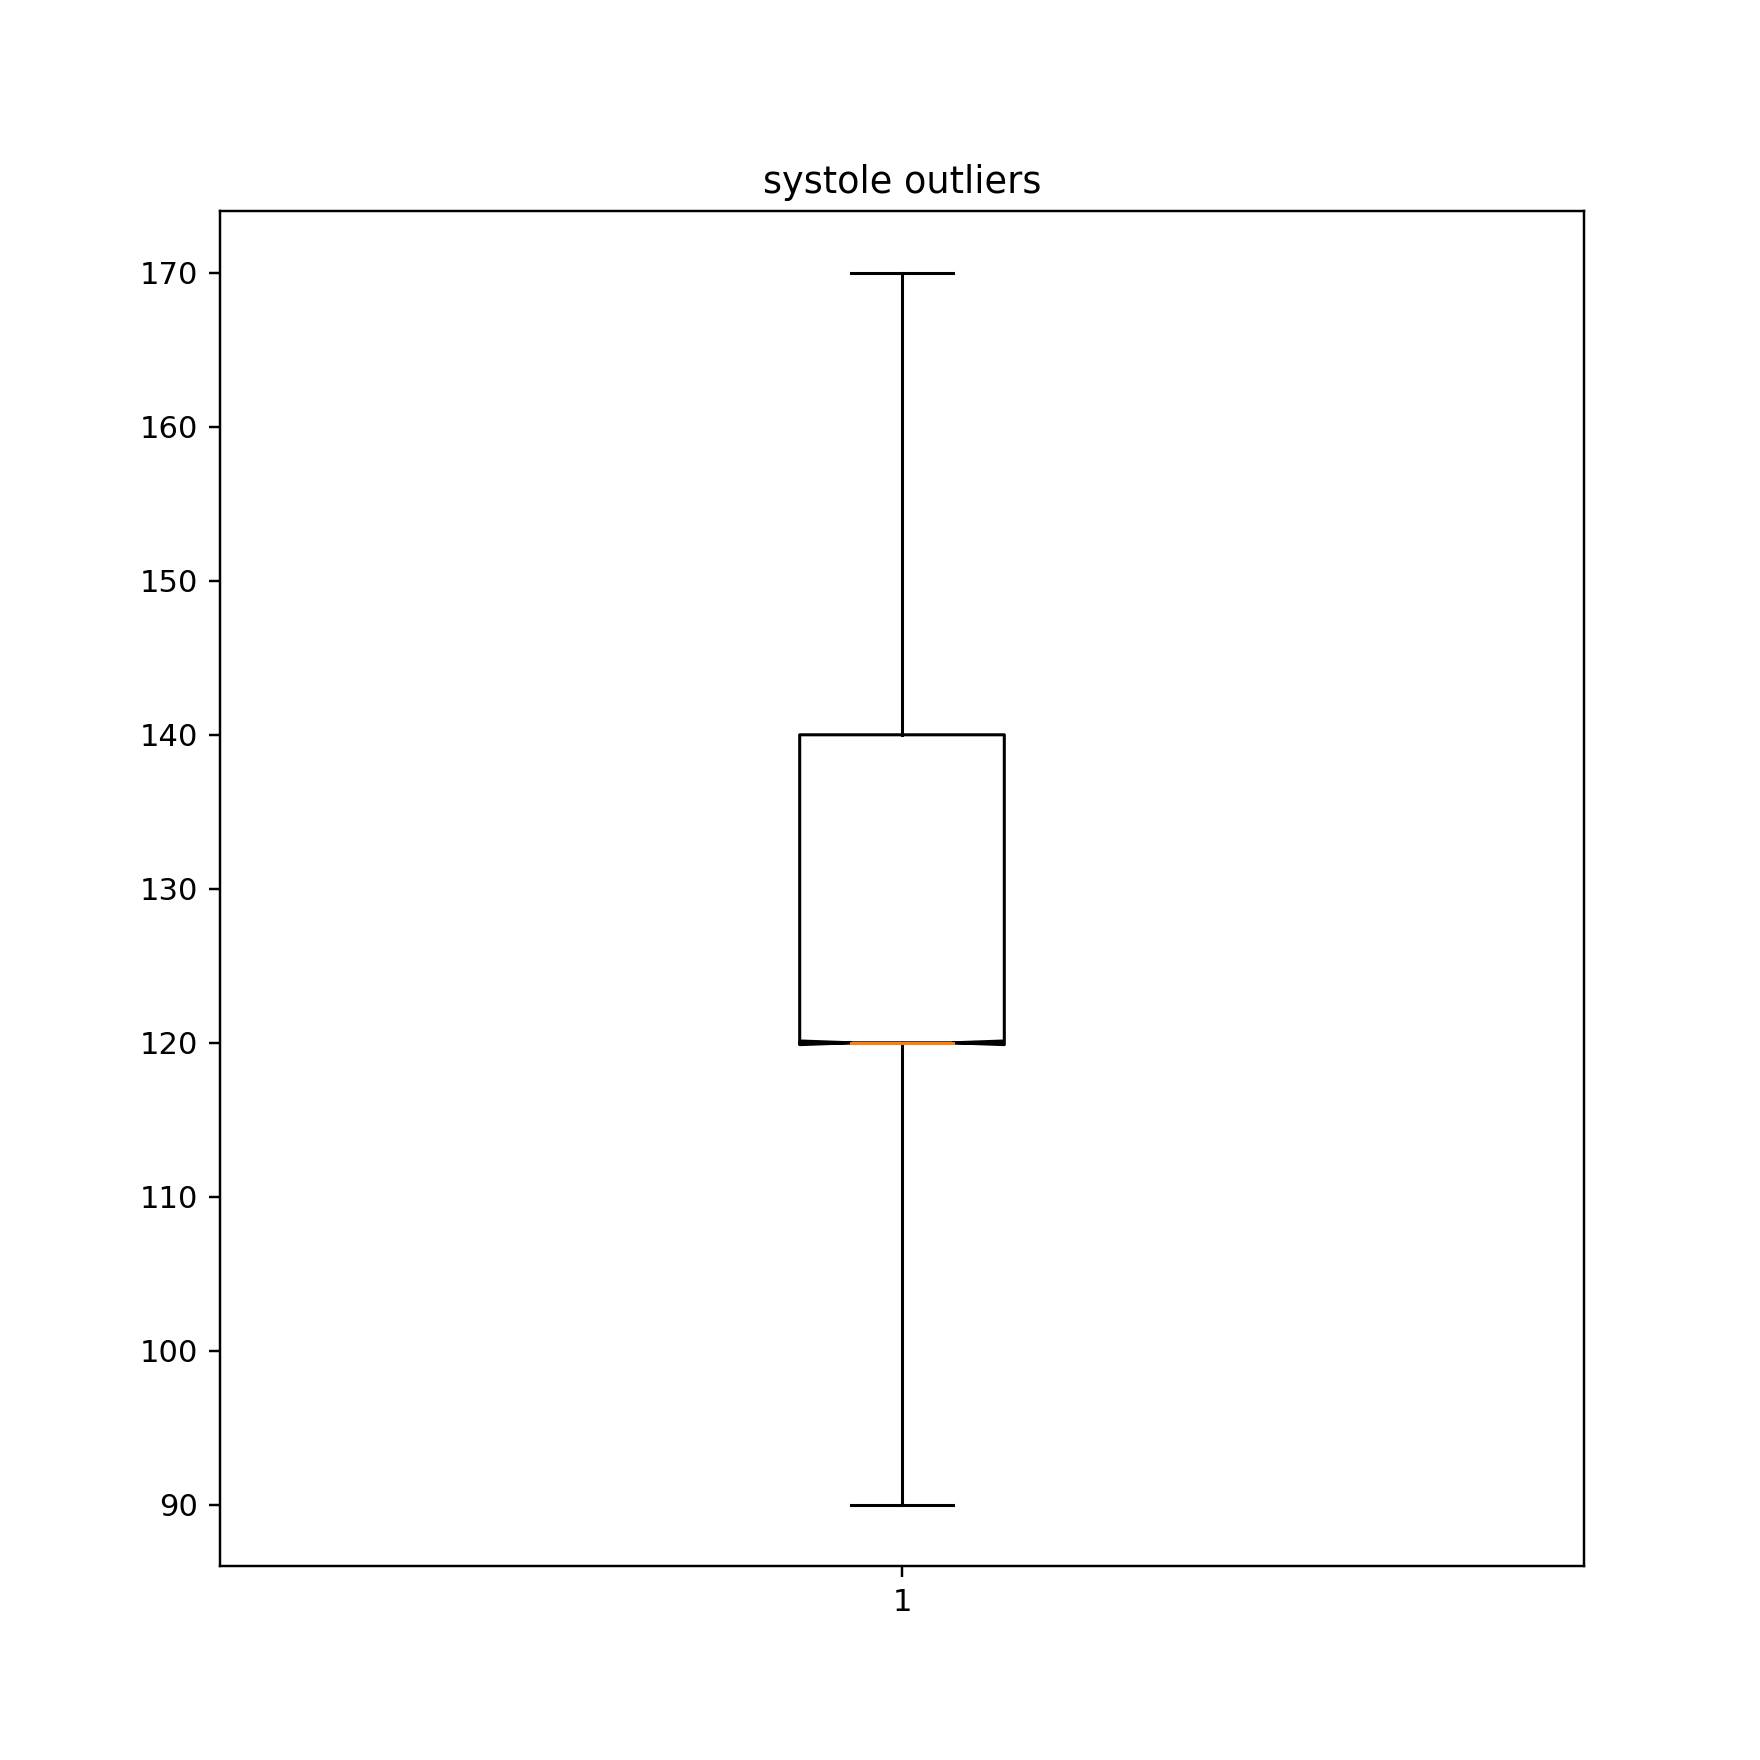

In [116]:
data = [cardio_df["systole"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Systole outliers')
ax1.boxplot(data, notch= True, showfliers=False)
plt.show()

In [117]:
# Filter all rows for which the patients  systole is greater than 400 and less than 80
new_df = cardio_df.drop(cardio_df[(cardio_df["systole"] > 200)].index)
new_df = new_df.drop(new_df[(new_df["systole"] < 80)].index)
print(new_df.shape)
new_df.head()

(69693, 13)


,id,age_in_years,gender,height,weight,systole,diastole,cholesterol,glucose,smoke,alcohol_intake,active,cardio
0,61901,64.0,1,160,105.0,200,11000,1,1,0,0,1,1
1,3352,58.0,2,186,105.0,140,10000,1,1,0,0,1,1
2,34098,50.0,2,169,86.0,150,10000,2,2,0,1,1,1
3,97907,52.0,1,166,70.0,160,10000,2,1,0,0,1,1
4,62058,60.0,2,179,62.0,130,9800,1,1,0,0,1,0


<IPython.core.display.Javascript object>


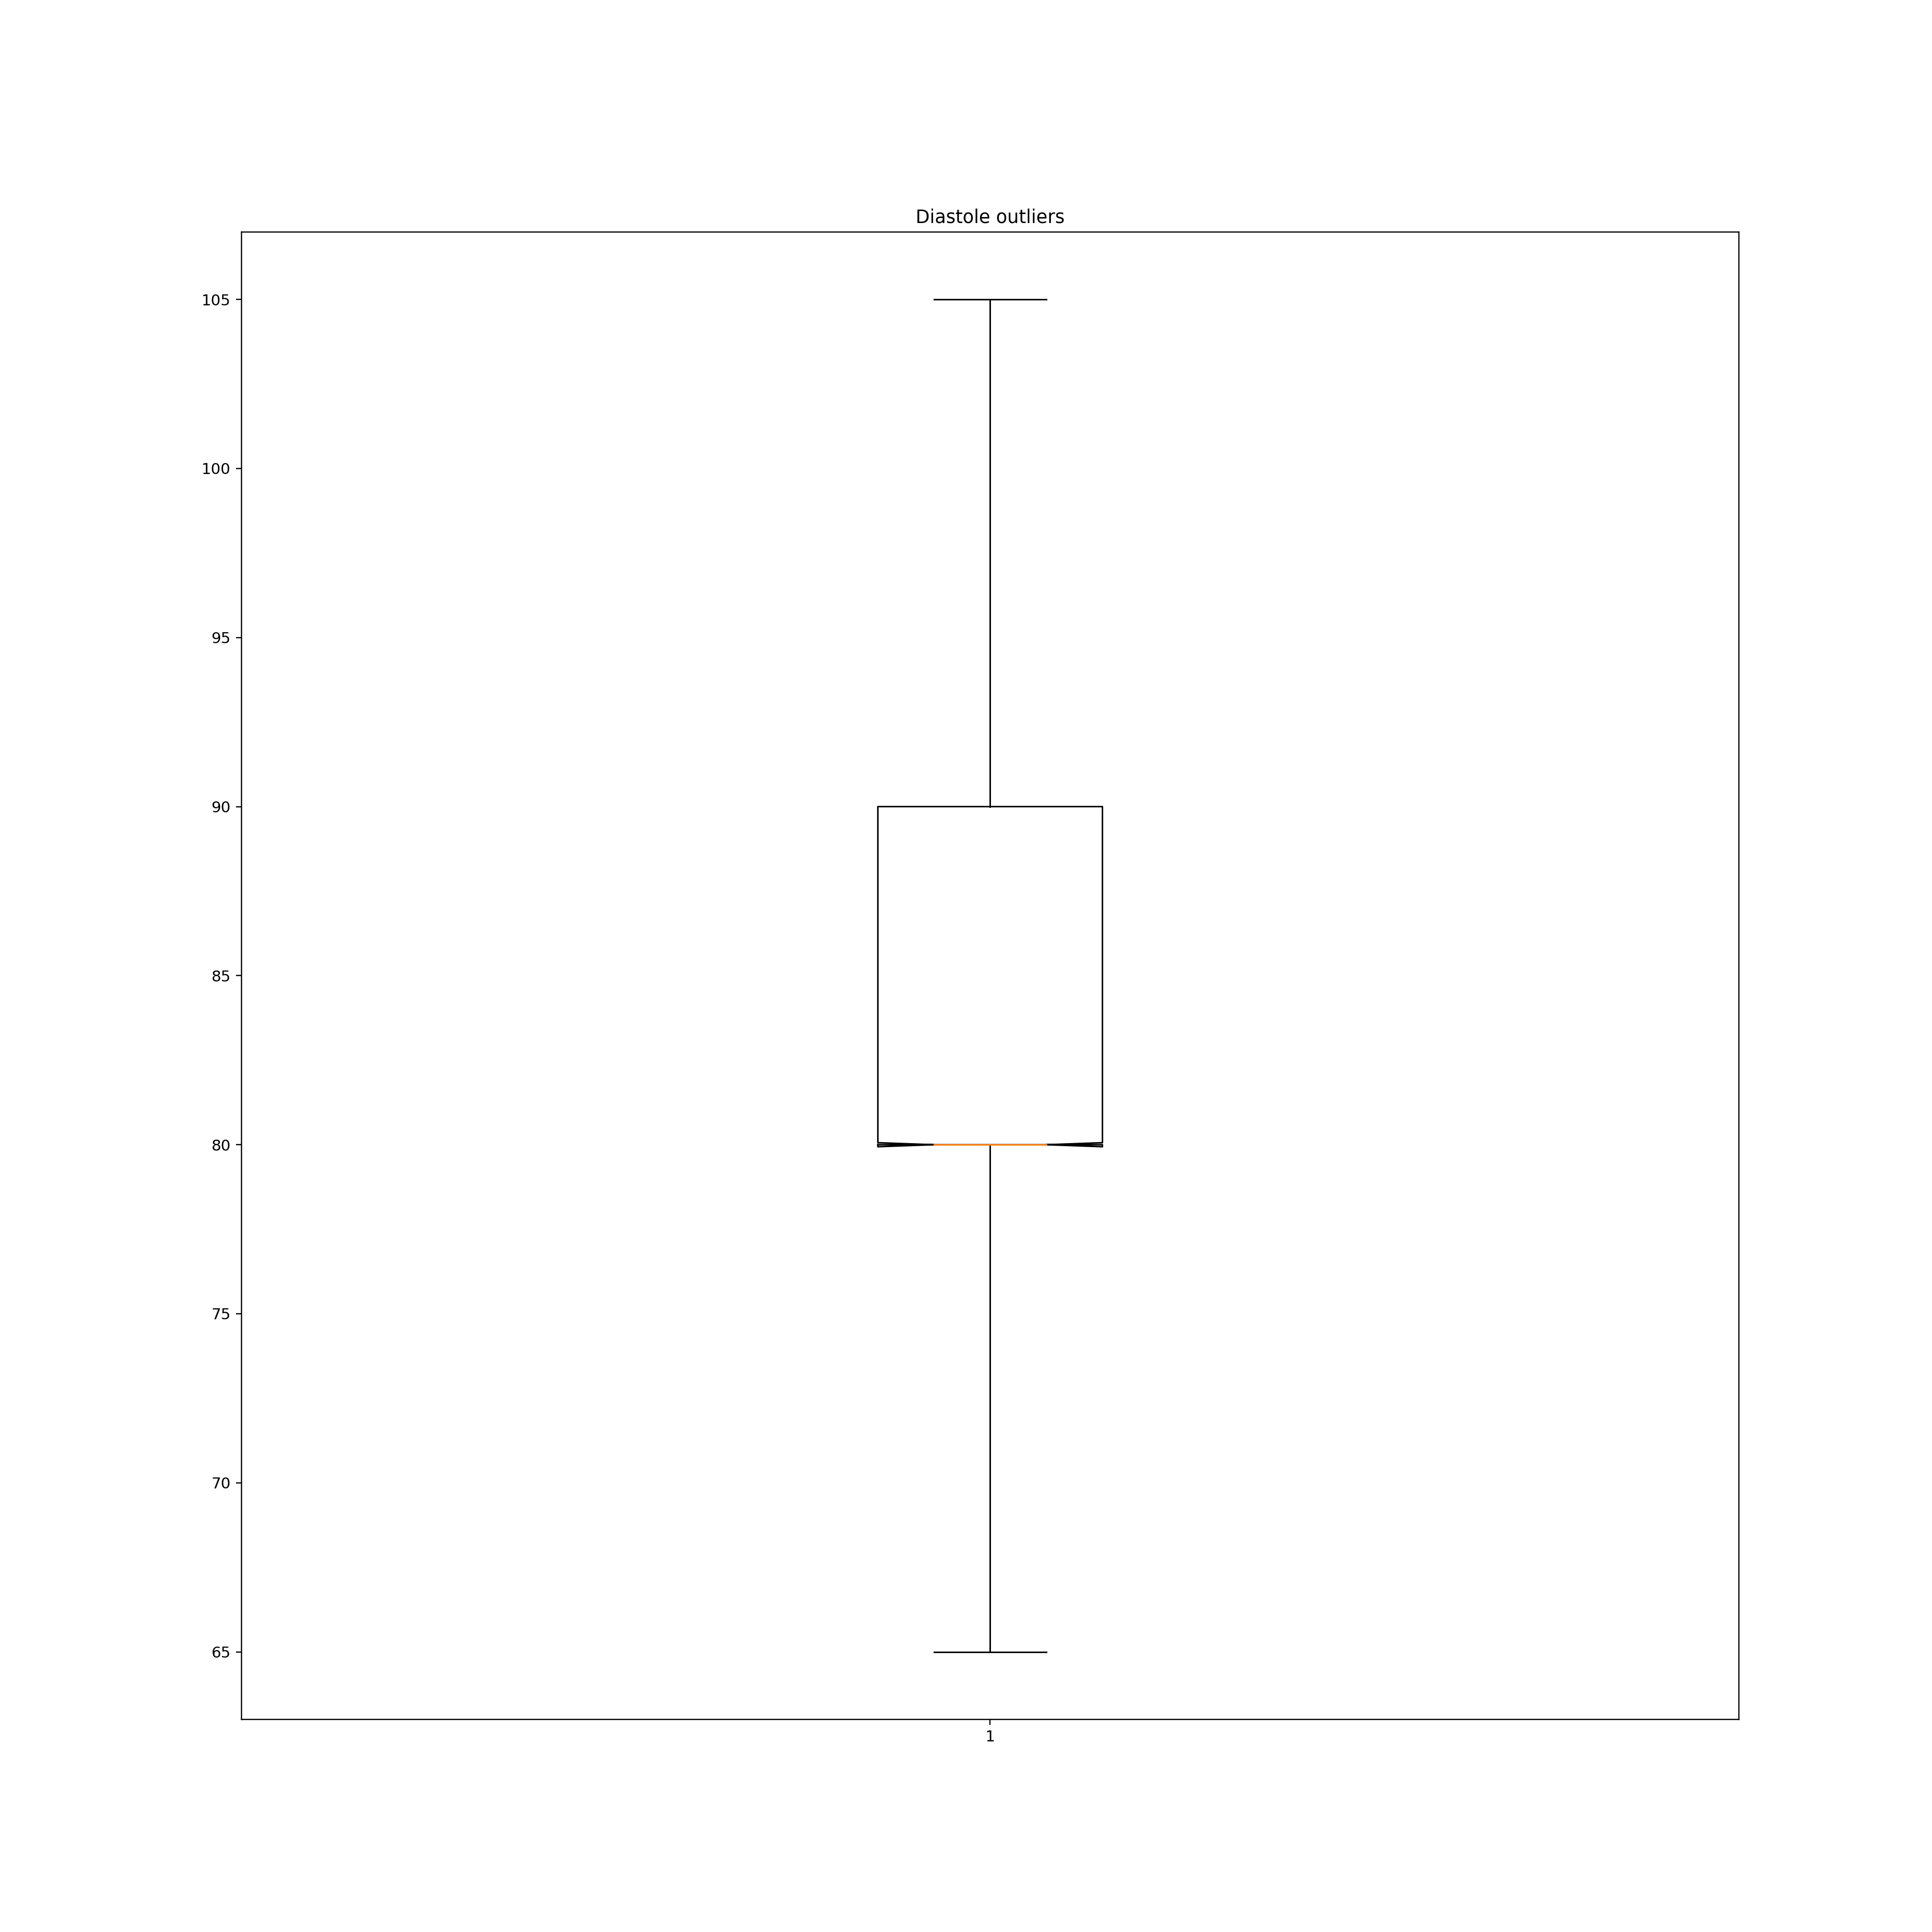

In [120]:
data = [cardio_df["diastole"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Diastole outliers')
ax1.boxplot(data, notch= True, showfliers=False)
plt.show()

In [121]:
# Filter all rows for which the patients diastole is greater than 585 and less than 50
diastole_df = new_df.drop(new_df[(new_df["diastole"] > 200)].index)
diastole_df = diastole_df.drop(diastole_df[(diastole_df["diastole"] < 50)].index)
print(diastole_df.shape)
diastole_df.head()

(68689, 13)


,id,age_in_years,gender,height,weight,systole,diastole,cholesterol,glucose,smoke,alcohol_intake,active,cardio
953,91264,44.0,1,164,69.0,130,190,1,1,0,0,1,0
954,70400,60.0,1,157,86.0,170,190,2,2,0,1,1,1
955,54282,60.0,1,161,84.0,196,182,2,2,0,0,1,1
956,68825,52.0,1,164,98.0,95,180,3,3,0,1,1,1
957,28449,63.0,1,160,88.0,150,180,1,1,0,0,0,1


<IPython.core.display.Javascript object>


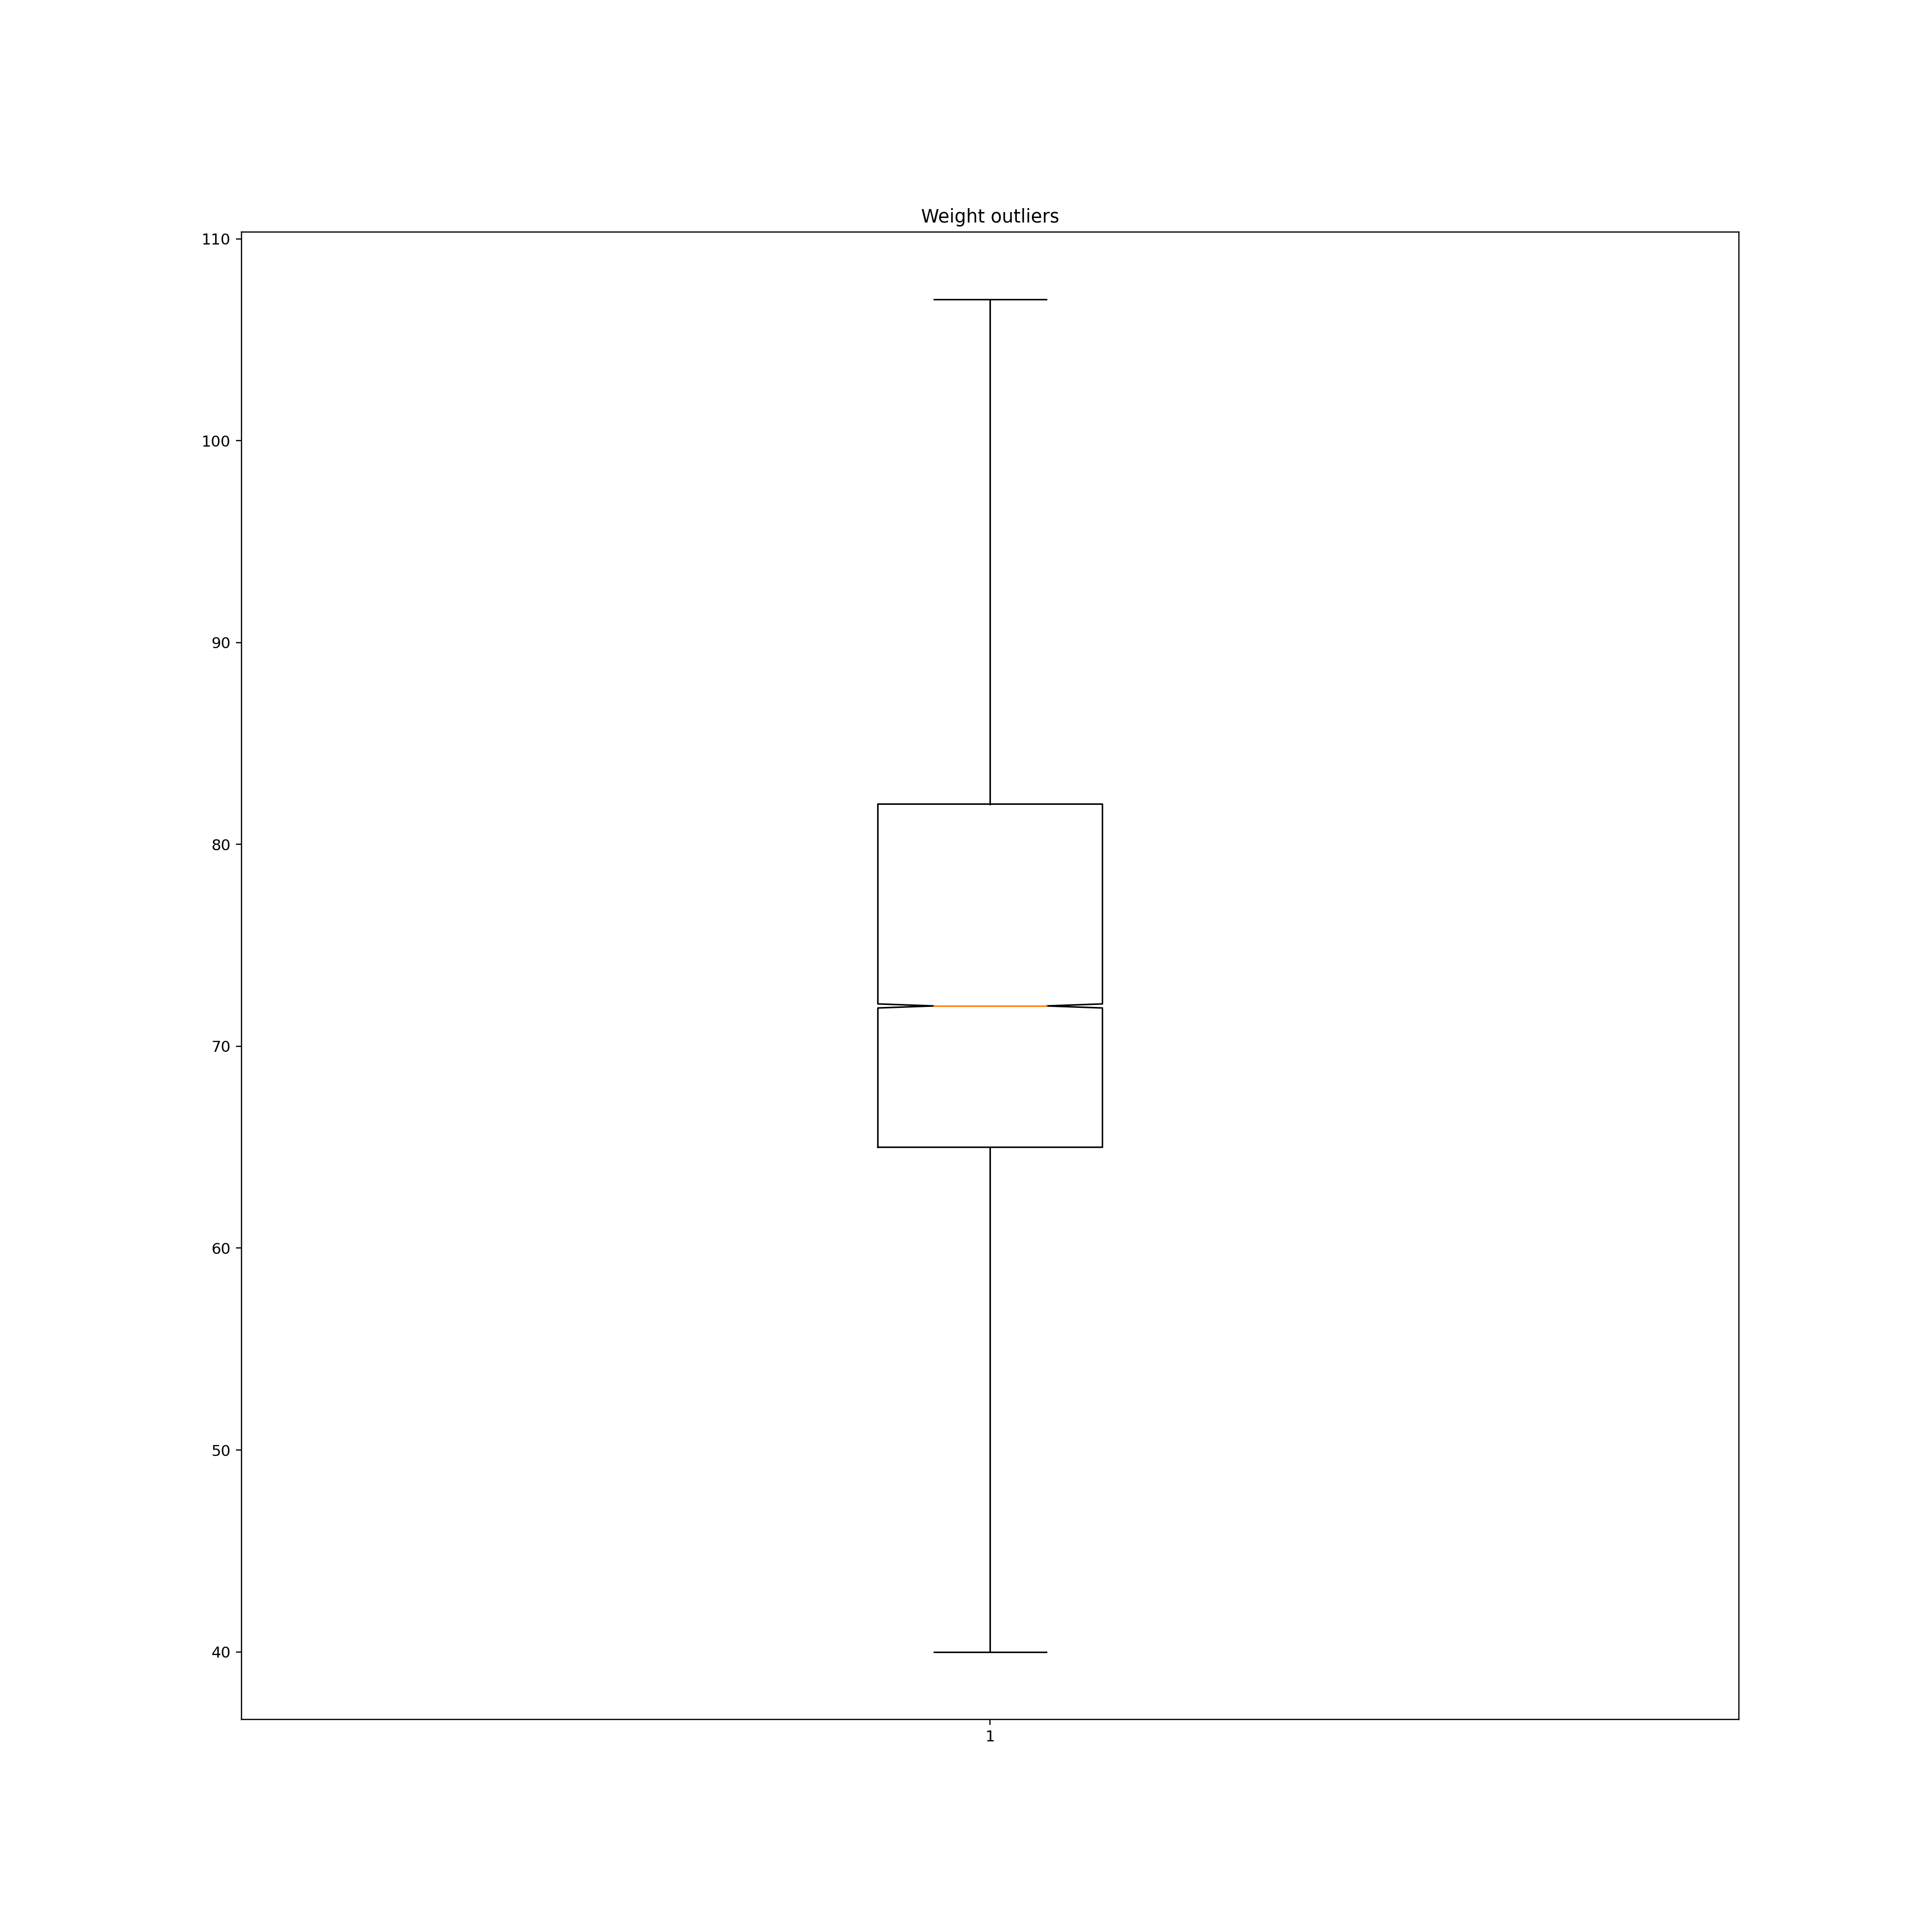

In [122]:
data = [cardio_df["weight"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Weight outliers')
ax1.boxplot(data, notch= True, showfliers=False)
plt.show()

In [123]:
# Filter all rows for which the patients weight is less than 60kgs
weight_df = diastole_df.drop(diastole_df[(diastole_df["weight"] < 60)].index)
print(weight_df.shape)
weight_df.head()

(60647, 13)


,id,age_in_years,gender,height,weight,systole,diastole,cholesterol,glucose,smoke,alcohol_intake,active,cardio
953,91264,44.0,1,164,69.0,130,190,1,1,0,0,1,0
954,70400,60.0,1,157,86.0,170,190,2,2,0,1,1,1
955,54282,60.0,1,161,84.0,196,182,2,2,0,0,1,1
956,68825,52.0,1,164,98.0,95,180,3,3,0,1,1,1
957,28449,63.0,1,160,88.0,150,180,1,1,0,0,0,1


<IPython.core.display.Javascript object>


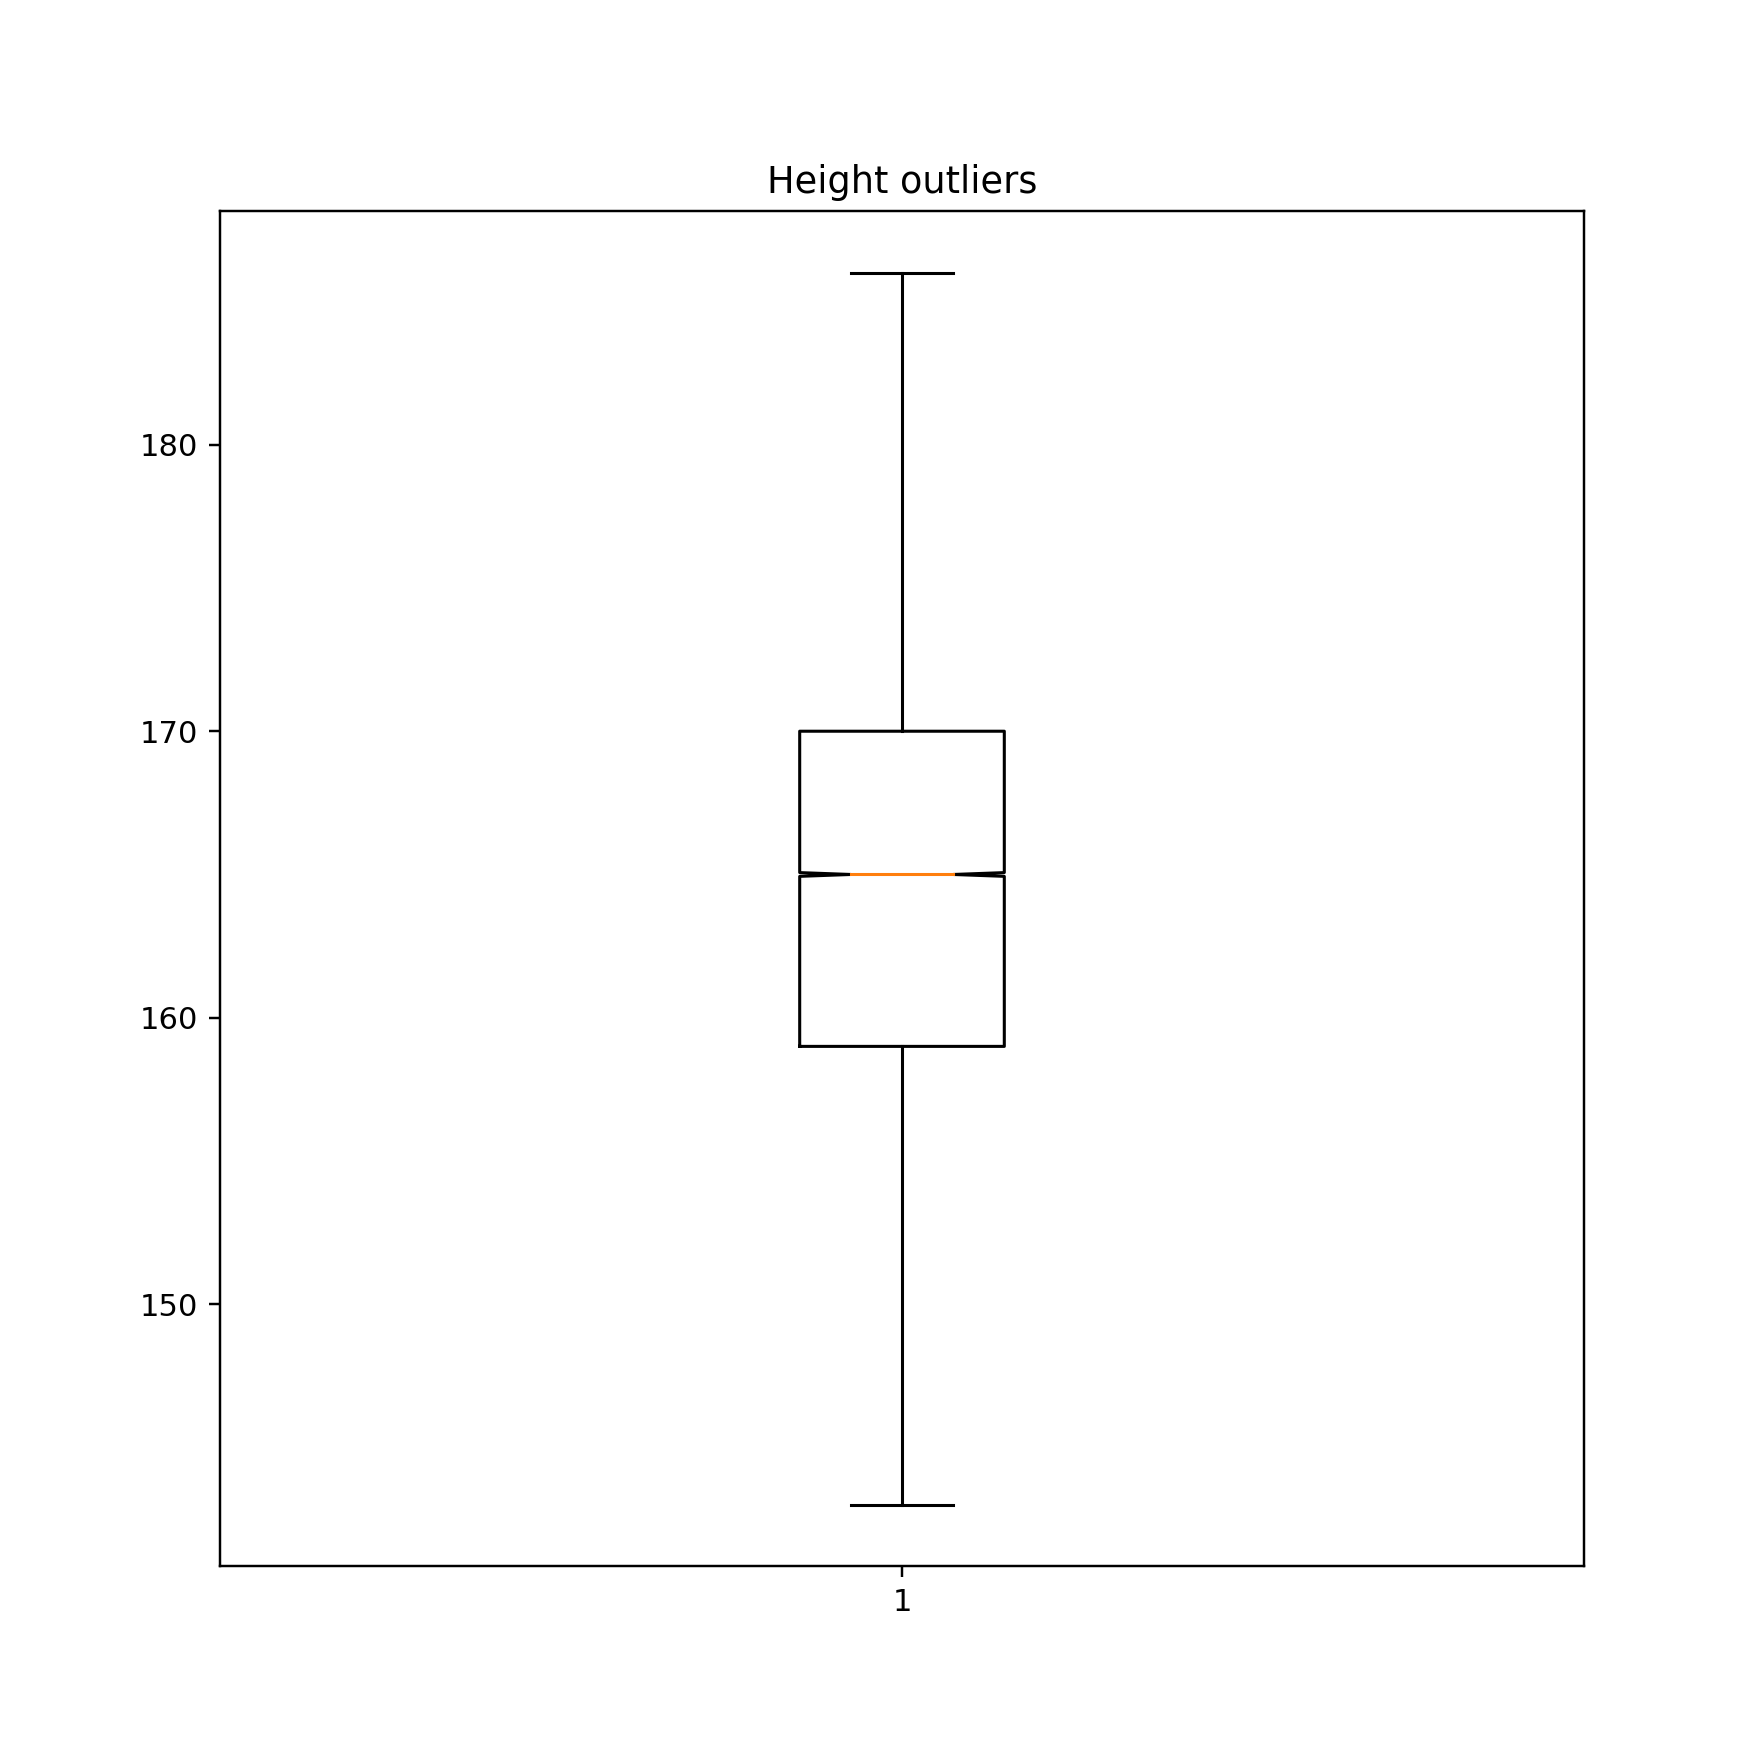

In [125]:
data = [cardio_df["height"]]
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.set_title('Height outliers')
ax1.boxplot(data, notch= True,showfliers=False)
plt.show()

In [138]:
# Filter all rows for which the patients height is less than 140 cms
height_df = weight_df.drop(weight_df[(weight_df["height"] < 140)].index)
height_df = height_df.drop(height_df[(height_df["height"]> 200)].index)
print(height_df.shape)
height_df.head()

(60532, 13)


,id,age_in_years,gender,height,weight,systole,diastole,cholesterol,glucose,smoke,alcohol_intake,active,cardio
953,91264,44.0,1,164,69.0,130,190,1,1,0,0,1,0
954,70400,60.0,1,157,86.0,170,190,2,2,0,1,1,1
955,54282,60.0,1,161,84.0,196,182,2,2,0,0,1,1
956,68825,52.0,1,164,98.0,95,180,3,3,0,1,1,1
957,28449,63.0,1,160,88.0,150,180,1,1,0,0,0,1


In [151]:
cholesterol_cardio_df = height_df["cardio"].groupby(height_df["cholesterol"]).mean()
cholesterol_cardio_df.head()

cholesterol
1    0.455010
2    0.614054
3    0.768679
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


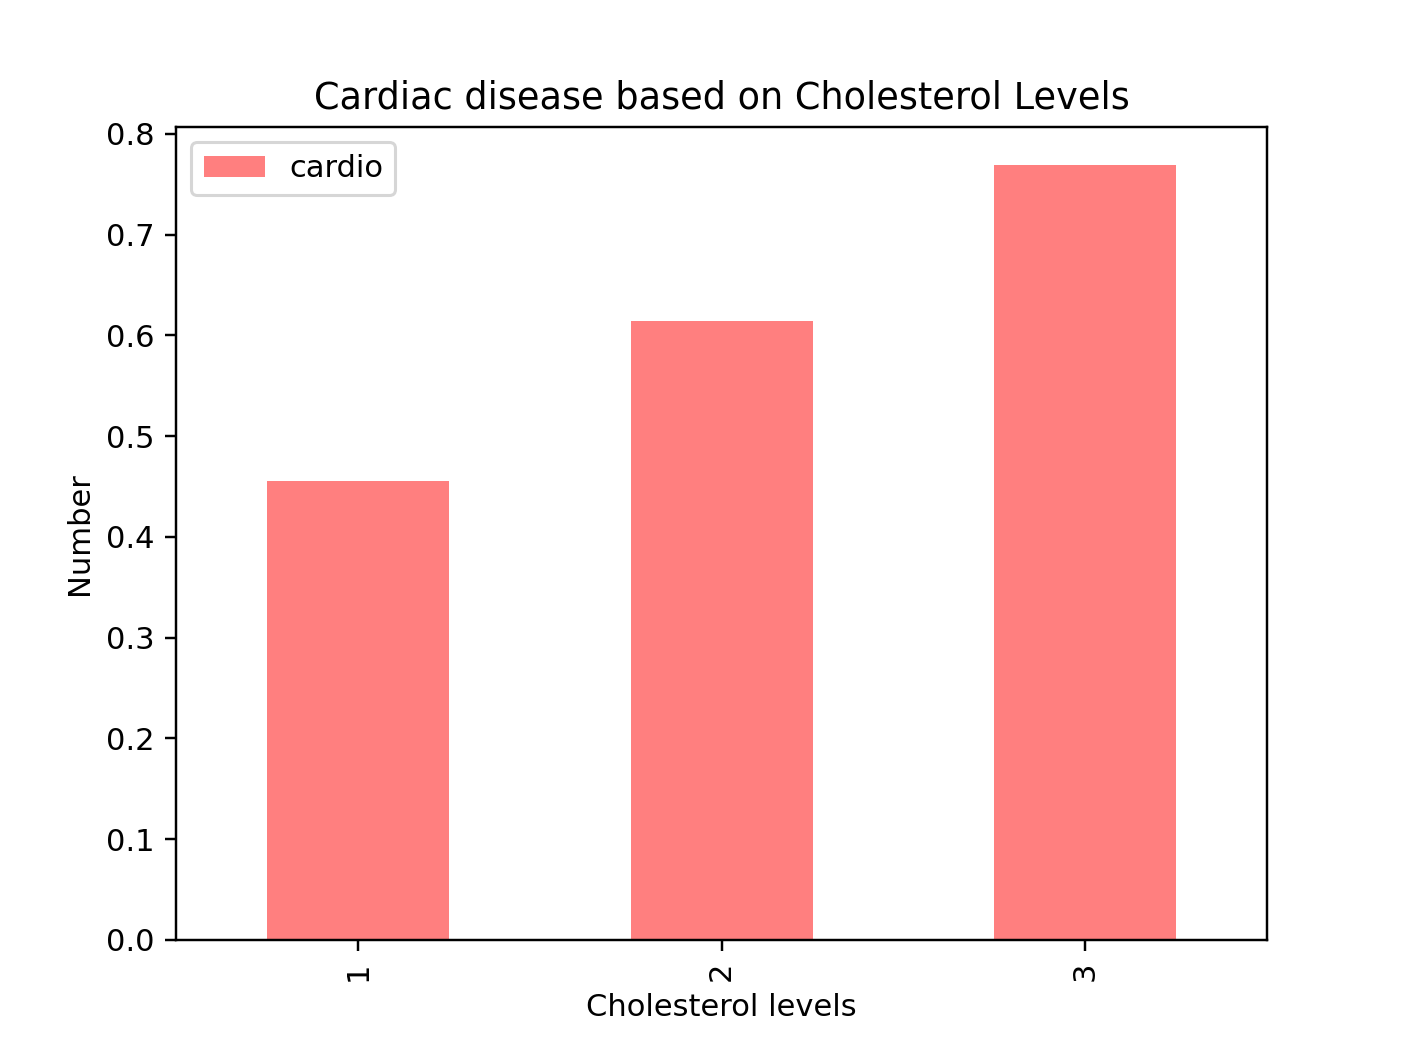

In [152]:
cholesterol_cardio_df.plot.bar(color='r', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Cholesterol levels")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Cholesterol Levels")
# Add the legend.
plt.legend()


In [160]:
print(f" People with very high Cholesterol level have a greater chance of developing heart disease.")

 People with very high Cholesterol level have a greater chance of developing heart disease.


In [153]:
glucose_cardio_df = height_df["cardio"].groupby(height_df["glucose"]).mean()
glucose_cardio_df.head()

glucose
1    0.495559
2    0.604198
3    0.627684
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


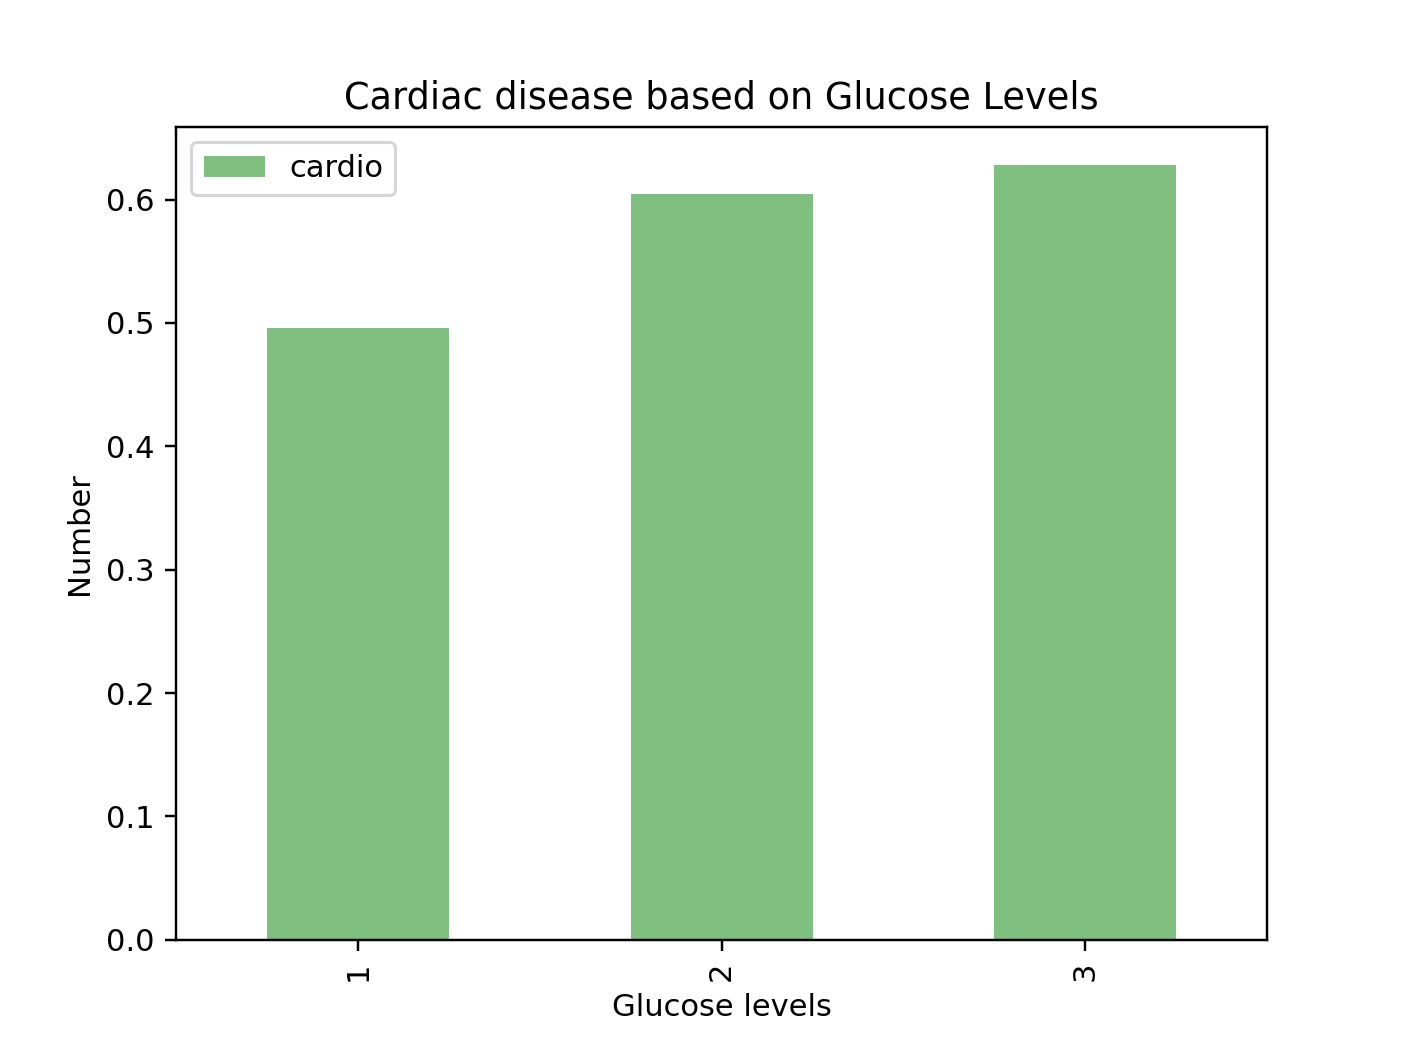

In [154]:
glucose_cardio_df.plot.bar(color='green', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Glucose levels")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Glucose Levels")
# Add the legend.
plt.legend()

In [161]:
print(f" People with very high Glucose level have a greater chance of developing heart disease.")

 People with very high Glucose level have a greater chance of developing heart disease.


In [155]:
gender_cardio_df = height_df["cardio"].groupby(height_df["gender"]).mean()
gender_cardio_df.head()

gender
1    0.516203
2    0.511121
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


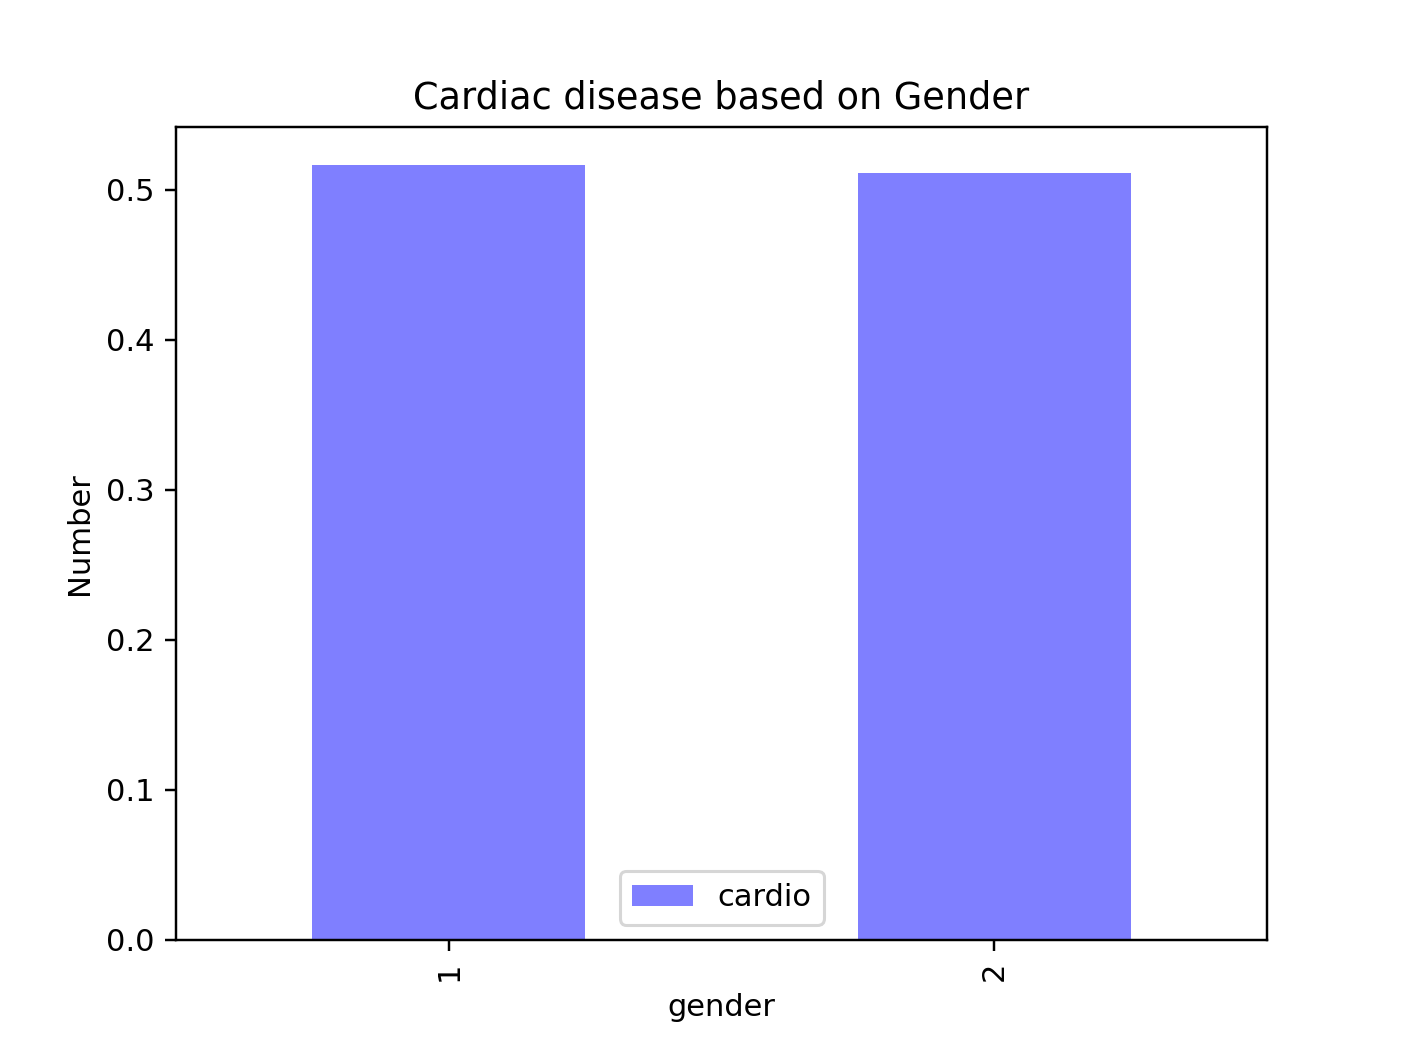

In [156]:
gender_cardio_df.plot.bar(color='blue', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("gender")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Gender")
# Add the legend.
plt.legend()

In [157]:
alcohol_cardio_df = height_df["cardio"].groupby(height_df["alcohol_intake"]).mean()
alcohol_cardio_df.head()

alcohol_intake
0    0.515393
1    0.496318
Name: cardio, dtype: float64

<IPython.core.display.Javascript object>


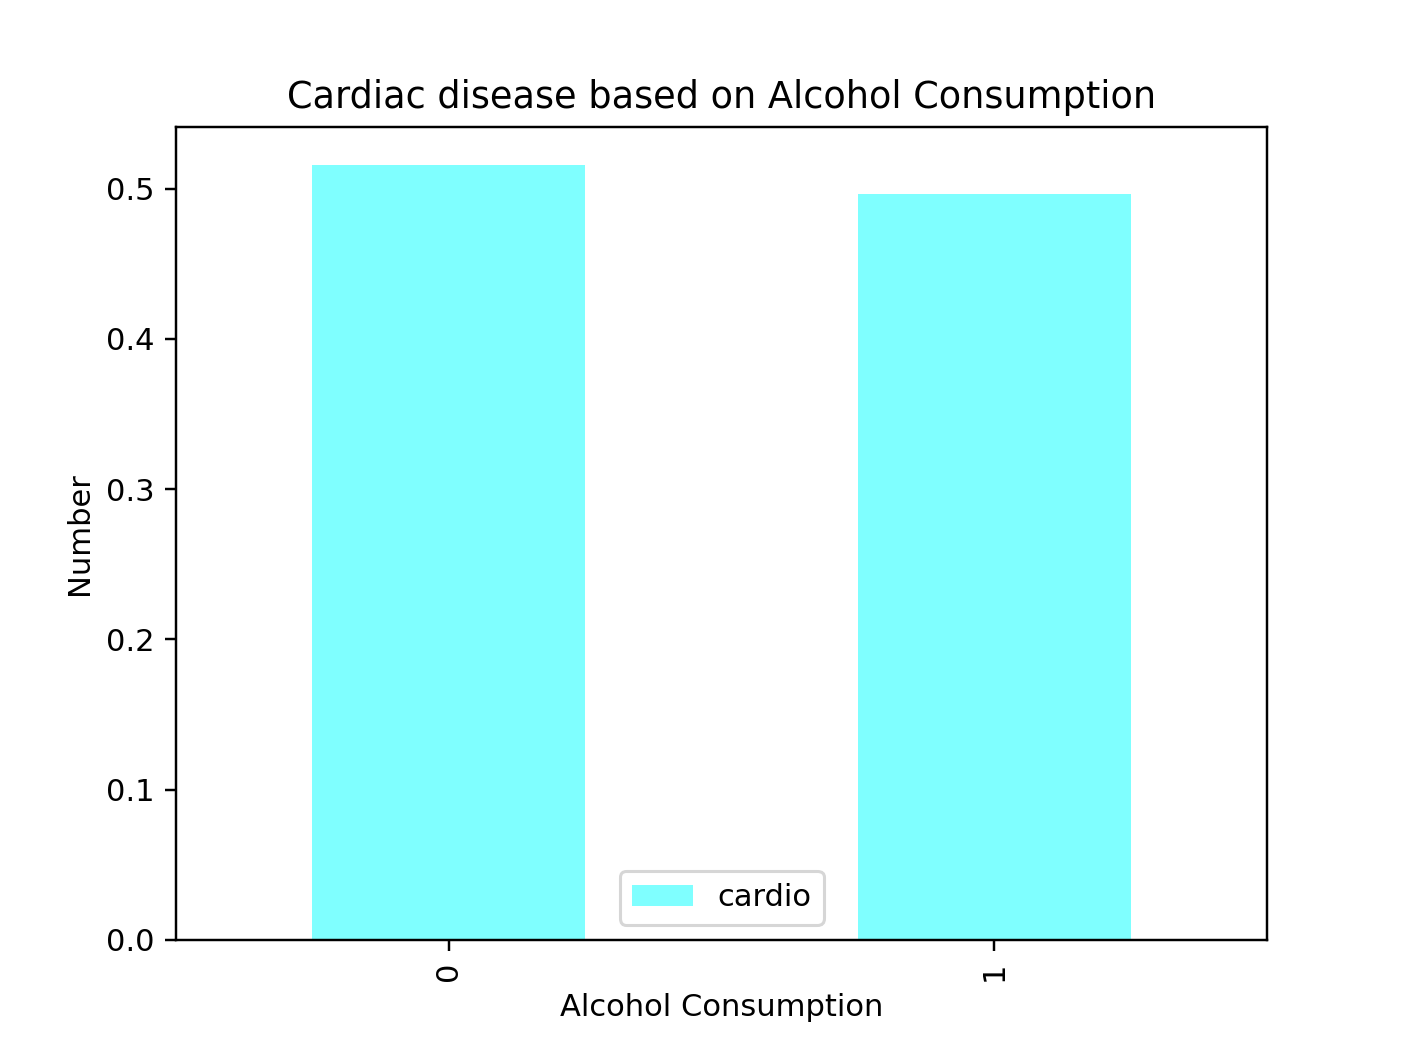

In [158]:
alcohol_cardio_df.plot.bar(color='cyan', alpha=0.5, align="center")
# Create labels for the x and y axes.
plt.xlabel("Alcohol Consumption")
plt.ylabel("Number")
# Create a title.
plt.title("Cardiac disease based on Alcohol Consumption")
# Add the legend.
plt.legend()

In [162]:
print(f" Alcohol consumption alone doesnot Contribute to developing heart disease.")

 Alcohol consumption alone doesnot Contribute to developing heart disease.
